## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_study_data["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate that shows up for Mouse ID and Timepoint. 
mouse_study_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False).sum()

10

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_data.loc[mouse_study_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False), :]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_data.drop(mouse_study_data.loc[mouse_study_data["Mouse ID"]=="g989"].index, inplace=True)


In [6]:
# Checking the number of mice in the clean DataFrame.

mouse_study_data["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_data_gb = mouse_study_data.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_vol_mean = drug_data_gb["Tumor Volume (mm3)"].mean()
tumor_vol_median = drug_data_gb["Tumor Volume (mm3)"].median()
tumor_vol_var = drug_data_gb["Tumor Volume (mm3)"].var()
tumor_vol_std = drug_data_gb["Tumor Volume (mm3)"].std()
tumor_vol_sem = drug_data_gb["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
tumor_vol_sum_stats = pd.DataFrame({
    
    "Mean": round(tumor_vol_mean,2),
    "Median": round(tumor_vol_median,2),
    "Variance": round(tumor_vol_var,2),
    "Std Dev": round(tumor_vol_std,2),
    "SEM": round(tumor_vol_sem,2)
})
tumor_vol_sum_stats.index.name = "Drug Regimen (Tumor Vol)"
tumor_vol_sum_stats

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen (Tumor Vol),,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_data_gb["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]).round(2)

,mean,median,var,std,sem
Drug Regimen (Tumor Vol),,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

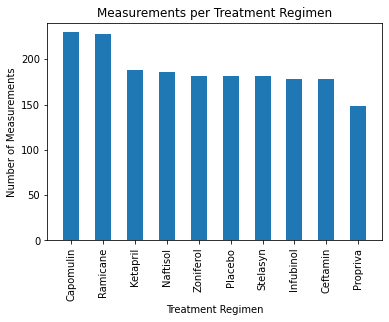

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_reg = mouse_study_data['Drug Regimen'].value_counts()
drug_reg.plot(kind = "bar")

plt.title("Measurements per Treatment Regimen")
plt.xlabel("Treatment Regimen")
plt.ylabel("Number of Measurements")

plt.xlim(-0.75, len(drug_reg.index)-.25)
plt.ylim(0, max(drug_reg.values) +10)

plt.show()


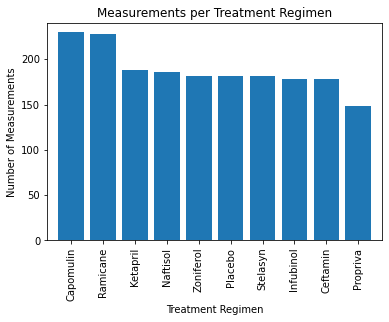

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(drug_reg.index, drug_reg.values)
plt.xticks(drug_reg.index, drug_reg.index, rotation="vertical")

plt.title("Measurements per Treatment Regimen")
plt.xlabel("Treatment Regimen")
plt.ylabel("Number of Measurements")

plt.xlim(-0.75, len(drug_reg.index)-.25)
plt.ylim(0, max(drug_reg.values) + 10)

plt.show()

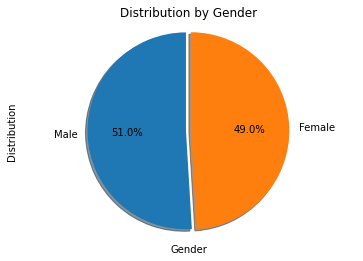

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_data = mouse_study_data["Sex"].value_counts() 
gender_data.plot(kind = "pie", explode=(0, 0.05), labels=gender_data.index, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title("Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Distribution")
plt.axis("equal")

plt.show()


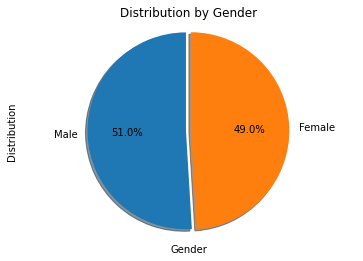

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_data.values,explode=(0, 0.05), labels=gender_data.index, autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Distribution")
plt.axis("equal")

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp = mouse_study_data.groupby("Mouse ID")["Timepoint"].max()
max_tp = max_tp.reset_index().rename(columns={"Timepoint": "Max Timepoint"})
max_tp

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_tp_data = pd.merge(mouse_study_data, max_tp, on="Mouse ID")
merged_tp_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
treatments_ls=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    locate_tp_data = merged_tp_data.loc[merged_tp_data["Drug Regimen"] == x]

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
locate_tp_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
484,a275,Ceftamin,Female,20,28,0,45.000000,0,45
485,a275,Ceftamin,Female,20,28,5,46.795257,0,45
486,a275,Ceftamin,Female,20,28,10,47.371343,0,45
487,a275,Ceftamin,Female,20,28,15,49.734404,0,45
488,a275,Ceftamin,Female,20,28,20,50.513437,1,45
...,...,...,...,...,...,...,...,...,...
1838,y865,Ceftamin,Male,23,26,25,57.173538,2,45
1839,y865,Ceftamin,Male,23,26,30,59.033275,3,45
1840,y865,Ceftamin,Male,23,26,35,61.153140,3,45
1841,y865,Ceftamin,Male,23,26,40,63.469549,3,45


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
